In [112]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your EV dataset
# Replace 'your_dataset.csv' with the actual file path or URL
df = pd.read_csv('/content/RS_Session_258_AU_429_1.csv')

In [113]:
# Display the first few rows of the dataset
print(df.head())

  S.No.                  State Name    2WN  2WT  2WIC    3WN      3WT   LMV  \
0     1  Andaman and Nicobar Island      2  5.0   NaN    NaN     30.0    86   
1     2              Andhra Pradesh  27629  NaN   2.0  374.0    108.0  1050   
2     3           Arunachal Pradesh     14  NaN   NaN    NaN      NaN     6   
3     4                       Assam   2287  NaN   NaN    NaN  79661.0   233   
4     5                       Bihar  13472  NaN   NaN    2.0  96560.0   231   

   LPV    LGV  4WIC  MMV  MPV  MGV   HPV  HGV     OTH  Grand Total  
0  6.0    NaN   NaN  NaN  NaN  NaN  40.0  NaN     NaN          169  
1  3.0  166.0   NaN  NaN  NaN  NaN   NaN  NaN  1117.0        30449  
2  1.0    NaN   NaN  NaN  NaN  NaN   NaN  NaN     NaN           21  
3  5.0   15.0   NaN  NaN  NaN  NaN  15.0  NaN     NaN        82216  
4  8.0   21.0   1.0  NaN  NaN  1.0  27.0  2.0     NaN       110325  


In [114]:
# Summary statistics
print(df.describe())

                2WN          2WT       2WIC         3WN            3WT  \
count      35.00000    11.000000  11.000000   16.000000      30.000000   
mean    45930.00000  1745.090909  10.545455   93.000000   61218.733333   
std    136815.20672  3832.732014  18.079622  197.159496  177268.414558   
min         1.00000     1.000000   1.000000    1.000000       1.000000   
25%       169.50000     6.000000   2.000000    2.000000     289.750000   
50%      8744.00000    20.000000   3.000000   18.500000    6995.000000   
75%     35121.00000    61.500000   5.500000   50.250000   30016.250000   
max    803775.00000  9598.000000  58.000000  744.000000  918281.000000   

                LMV          LPV          LGV       4WIC  MMV         MPV  \
count     35.000000    32.000000    26.000000   8.000000  3.0   14.000000   
mean    3070.114286   501.000000   256.846154   4.000000  4.0   60.142857   
std     9382.845695  1542.957717   710.709150   5.182388  2.0  122.108311   
min        3.000000     1

In [115]:
# Check for missing values
print(df.isnull().sum())

S.No.           0
State Name      0
2WN             0
2WT            24
2WIC           24
3WN            19
3WT             5
LMV             0
LPV             3
LGV             9
4WIC           27
MMV            32
MPV            21
MGV            24
HPV            10
HGV            15
OTH            21
Grand Total     0
dtype: int64


In [116]:
display(df)

,S.No.,State Name,2WN,2WT,2WIC,3WN,3WT,LMV,LPV,LGV,4WIC,MMV,MPV,MGV,HPV,HGV,OTH,Grand Total
0,1,Andaman and Nicobar Island,2,5.0,NaN,NaN,30.0,86,6.0,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,169
1,2,Andhra Pradesh,27629,NaN,2.0,374.0,108.0,1050,3.0,166.0,NaN,NaN,NaN,NaN,NaN,NaN,1117.0,30449
2,3,Arunachal Pradesh,14,NaN,NaN,NaN,NaN,6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21
3,4,Assam,2287,NaN,NaN,NaN,79661.0,233,5.0,15.0,NaN,NaN,NaN,NaN,15.0,NaN,NaN,82216
4,5,Bihar,13472,NaN,NaN,2.0,96560.0,231,8.0,21.0,1.0,NaN,NaN,1.0,27.0,2.0,NaN,110325
5,6,Chandigarh,1004,NaN,NaN,NaN,2683.0,391,2.0,NaN,NaN,NaN,7.0,NaN,73.0,NaN,1.0,4161
6,7,Chhattisgarh,20112,NaN,NaN,130.0,9865.0,396,44.0,1070.0,NaN,NaN,1.0,NaN,NaN,7.0,367.0,31992
7,8,Delhi,43627,NaN,2.0,NaN,130429.0,5796,3415.0,50.0,4.0,NaN,2.0,NaN,416.0,NaN,NaN,183741
8,9,Goa,5555,1.0,NaN,4.0,55.0,861,4.0,25.0,NaN,NaN,NaN,NaN,51.0,1.0,2.0,6559
9,10,Gujarat,67990,NaN,3.0,32.0,2964.0,3926,91.0,51.0,6.0,2.0,60.0,6.0,364.0,7.0,153.0,75655


In [117]:
# Replace missing values with appropriate values
columns_to_fill = ['2WN', '2WT', '2WIC', '3WN', '3WT', 'LMV', 'LPV',
                   'LGV', '4WIC', 'MMV', 'MPV', 'MGV', 'HPV', 'HGV', 'OTH', 'Grand Total']

for column in columns_to_fill:
    # Fill missing values with 0
    df[column].fillna(0, inplace=True)

# Display the number of missing values after handling
print("\nMissing values after handling:")
print(df.isnull().sum())



Missing values after handling:
S.No.          0
State Name     0
2WN            0
2WT            0
2WIC           0
3WN            0
3WT            0
LMV            0
LPV            0
LGV            0
4WIC           0
MMV            0
MPV            0
MGV            0
HPV            0
HGV            0
OTH            0
Grand Total    0
dtype: int64


In [118]:
print(df.columns)

Index(['S.No.', 'State Name', '2WN', '2WT', '2WIC', '3WN', '3WT', 'LMV', 'LPV',
       'LGV', '4WIC', 'MMV', 'MPV', 'MGV', 'HPV', 'HGV', 'OTH', 'Grand Total'],
      dtype='object')


In [119]:
print(df)

          S.No.                                State Name     2WN     2WT  \
0             1                Andaman and Nicobar Island       2     5.0   
1             2                            Andhra Pradesh   27629     0.0   
2             3                         Arunachal Pradesh      14     0.0   
3             4                                     Assam    2287     0.0   
4             5                                     Bihar   13472     0.0   
5             6                                Chandigarh    1004     0.0   
6             7                              Chhattisgarh   20112     0.0   
7             8                                     Delhi   43627     0.0   
8             9                                       Goa    5555     1.0   
9            10                                   Gujarat   67990     0.0   
10           11                                   Haryana   17935    53.0   
11           12                          Himachal Pradesh    1190     0.0   

In [120]:
# Display columns with commas in numeric values
columns_with_commas = []

for column in df.columns:
    if df[column].dtype == 'object' and any(df[column].str.contains(',')):
        columns_with_commas.append(column)

print("Columns with Commas in Numeric Values:\n", columns_with_commas)


Columns with Commas in Numeric Values:
 []


In [121]:
df.drop(34, inplace=True)

In [122]:
print(df.dtypes)

S.No.           object
State Name      object
2WN              int64
2WT            float64
2WIC           float64
3WN            float64
3WT            float64
LMV              int64
LPV            float64
LGV            float64
4WIC           float64
MMV            float64
MPV            float64
MGV            float64
HPV            float64
HGV            float64
OTH            float64
Grand Total      int64
dtype: object


In [123]:
display(df)

,S.No.,State Name,2WN,2WT,2WIC,3WN,3WT,LMV,LPV,LGV,4WIC,MMV,MPV,MGV,HPV,HGV,OTH,Grand Total
0,1,Andaman and Nicobar Island,2,5.0,0.0,0.0,30.0,86,6.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,169
1,2,Andhra Pradesh,27629,0.0,2.0,374.0,108.0,1050,3.0,166.0,0.0,0.0,0.0,0.0,0.0,0.0,1117.0,30449
2,3,Arunachal Pradesh,14,0.0,0.0,0.0,0.0,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21
3,4,Assam,2287,0.0,0.0,0.0,79661.0,233,5.0,15.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,82216
4,5,Bihar,13472,0.0,0.0,2.0,96560.0,231,8.0,21.0,1.0,0.0,0.0,1.0,27.0,2.0,0.0,110325
5,6,Chandigarh,1004,0.0,0.0,0.0,2683.0,391,2.0,0.0,0.0,0.0,7.0,0.0,73.0,0.0,1.0,4161
6,7,Chhattisgarh,20112,0.0,0.0,130.0,9865.0,396,44.0,1070.0,0.0,0.0,1.0,0.0,0.0,7.0,367.0,31992
7,8,Delhi,43627,0.0,2.0,0.0,130429.0,5796,3415.0,50.0,4.0,0.0,2.0,0.0,416.0,0.0,0.0,183741
8,9,Goa,5555,1.0,0.0,4.0,55.0,861,4.0,25.0,0.0,0.0,0.0,0.0,51.0,1.0,2.0,6559
9,10,Gujarat,67990,0.0,3.0,32.0,2964.0,3926,91.0,51.0,6.0,2.0,60.0,6.0,364.0,7.0,153.0,75655


In [124]:
'''
# Display the df types of each column
print("Data Types Before Correction:\n", df.dtypes)

# List of columns containing numeric values with commas to be converted
columns_with_commas = ['State Name', 'No. of EV Chargers Sanctioned']

# Convert columns with commas to numeric format
df[columns_with_commas] = df[columns_with_commas].replace({',': ''}, regex=True).astype(float)

# Display the updated df types
print("\nData Types After Conversion:\n", df.dtypes)

# Display the updated dataset
print("\nUpdated Dataset:\n", df.head())'''

'\n# Display the df types of each column\nprint("Data Types Before Correction:\n", df.dtypes)\n\n# List of columns containing numeric values with commas to be converted\ncolumns_with_commas = [\'State Name\', \'No. of EV Chargers Sanctioned\']\n\n# Convert columns with commas to numeric format\ndf[columns_with_commas] = df[columns_with_commas].replace({\',\': \'\'}, regex=True).astype(float)\n\n# Display the updated df types\nprint("\nData Types After Conversion:\n", df.dtypes)\n\n# Display the updated dataset\nprint("\nUpdated Dataset:\n", df.head())'

In [125]:
print(df.columns)

Index(['S.No.', 'State Name', '2WN', '2WT', '2WIC', '3WN', '3WT', 'LMV', 'LPV',
       'LGV', '4WIC', 'MMV', 'MPV', 'MGV', 'HPV', 'HGV', 'OTH', 'Grand Total'],
      dtype='object')


In [126]:
display(df)

,S.No.,State Name,2WN,2WT,2WIC,3WN,3WT,LMV,LPV,LGV,4WIC,MMV,MPV,MGV,HPV,HGV,OTH,Grand Total
0,1,Andaman and Nicobar Island,2,5.0,0.0,0.0,30.0,86,6.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,169
1,2,Andhra Pradesh,27629,0.0,2.0,374.0,108.0,1050,3.0,166.0,0.0,0.0,0.0,0.0,0.0,0.0,1117.0,30449
2,3,Arunachal Pradesh,14,0.0,0.0,0.0,0.0,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21
3,4,Assam,2287,0.0,0.0,0.0,79661.0,233,5.0,15.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,82216
4,5,Bihar,13472,0.0,0.0,2.0,96560.0,231,8.0,21.0,1.0,0.0,0.0,1.0,27.0,2.0,0.0,110325
5,6,Chandigarh,1004,0.0,0.0,0.0,2683.0,391,2.0,0.0,0.0,0.0,7.0,0.0,73.0,0.0,1.0,4161
6,7,Chhattisgarh,20112,0.0,0.0,130.0,9865.0,396,44.0,1070.0,0.0,0.0,1.0,0.0,0.0,7.0,367.0,31992
7,8,Delhi,43627,0.0,2.0,0.0,130429.0,5796,3415.0,50.0,4.0,0.0,2.0,0.0,416.0,0.0,0.0,183741
8,9,Goa,5555,1.0,0.0,4.0,55.0,861,4.0,25.0,0.0,0.0,0.0,0.0,51.0,1.0,2.0,6559
9,10,Gujarat,67990,0.0,3.0,32.0,2964.0,3926,91.0,51.0,6.0,2.0,60.0,6.0,364.0,7.0,153.0,75655


In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-128-fa6ad3c4b684>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


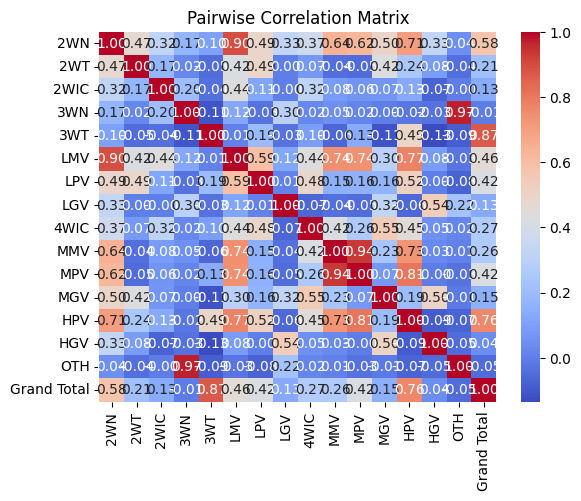

In [128]:
# Pairwise correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pairwise Correlation Matrix')
plt.show()


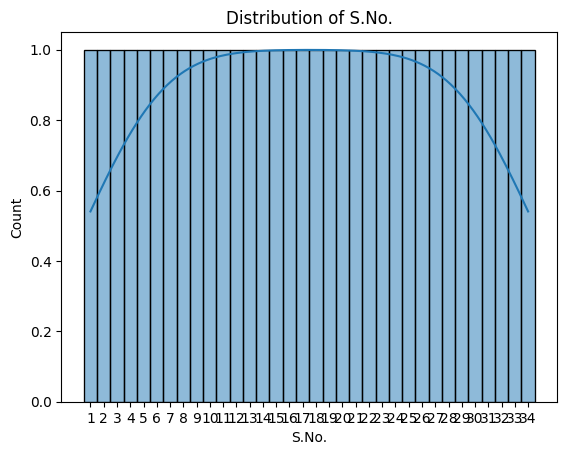

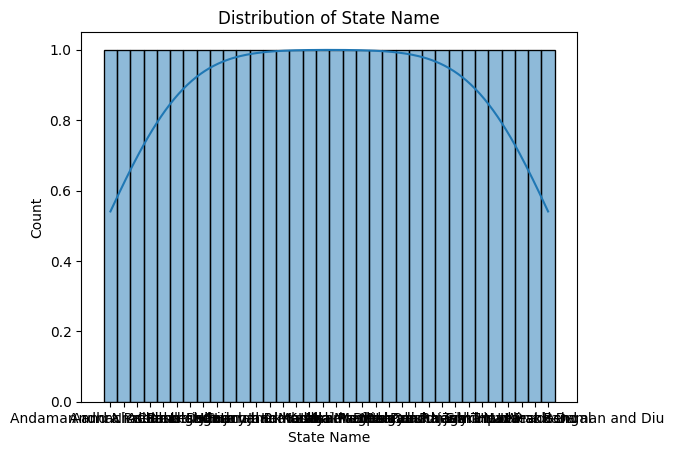

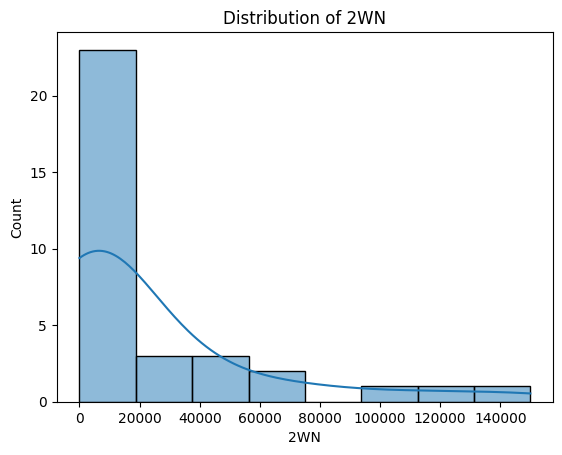

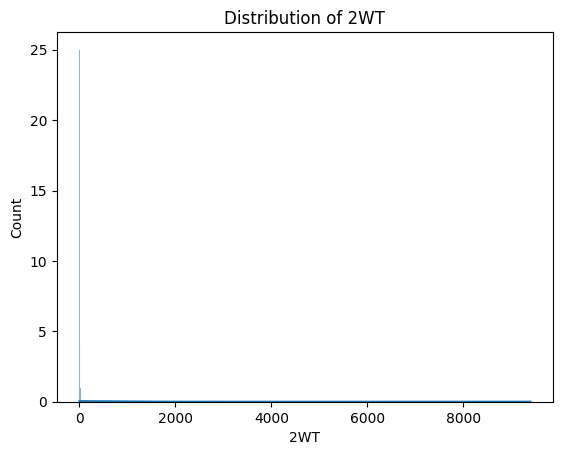

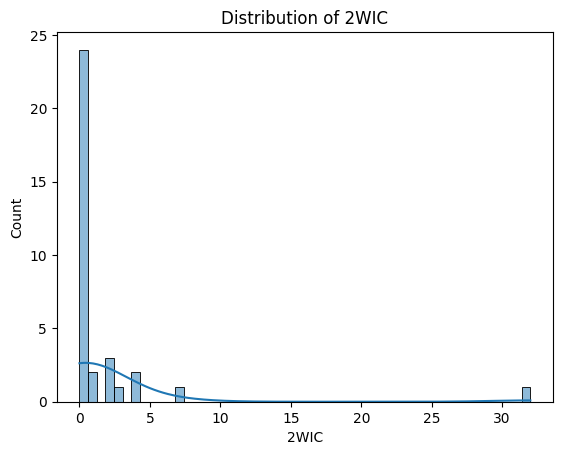

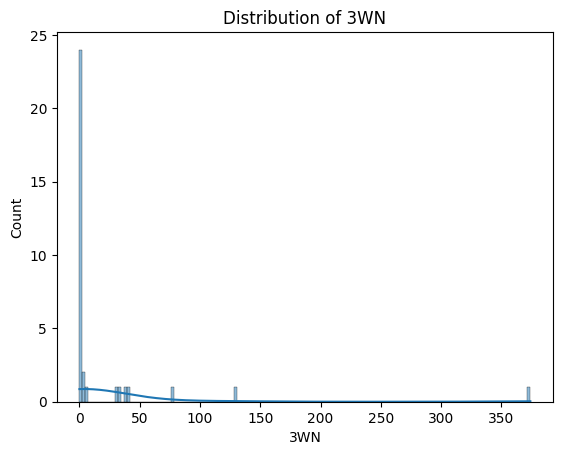

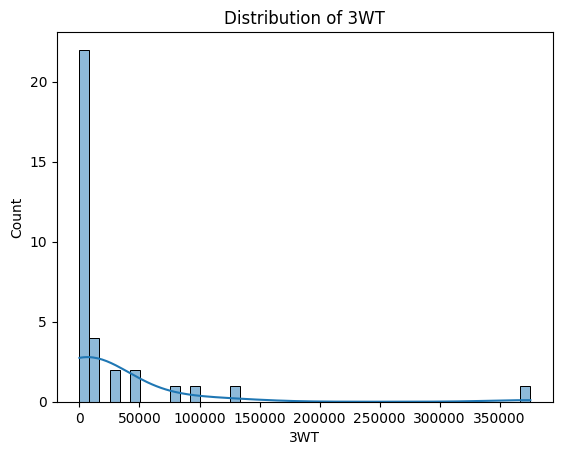

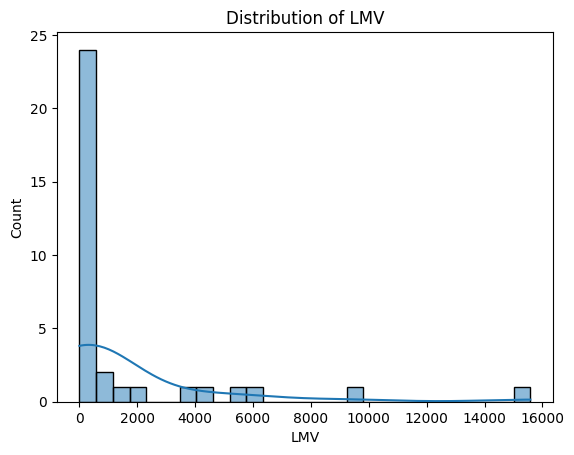

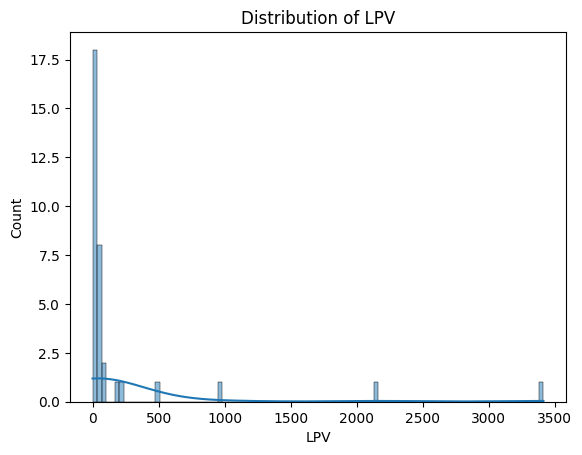

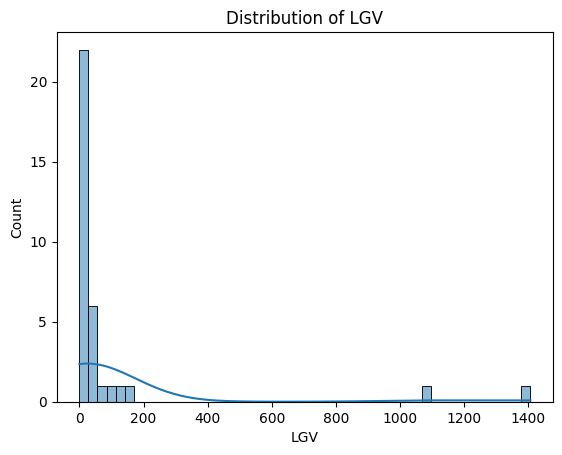

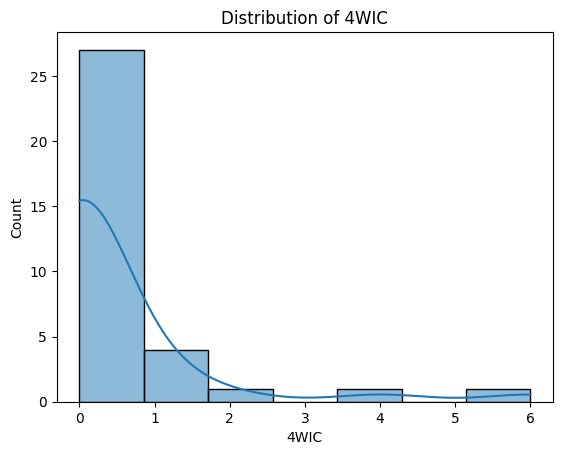

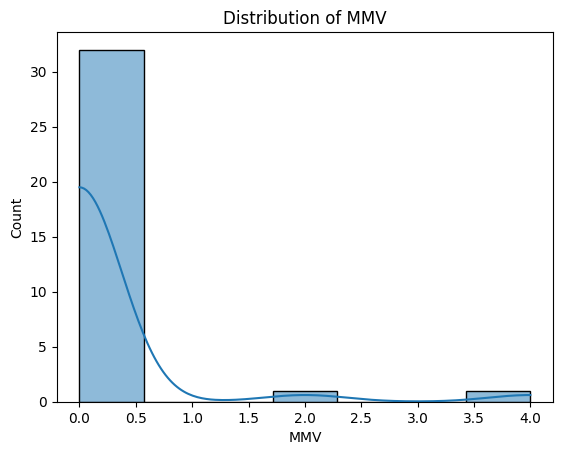

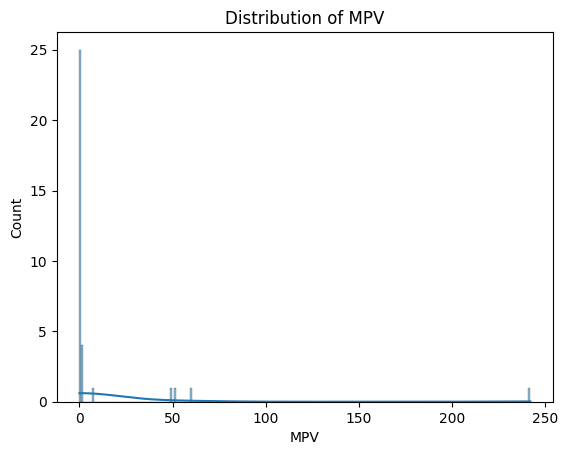

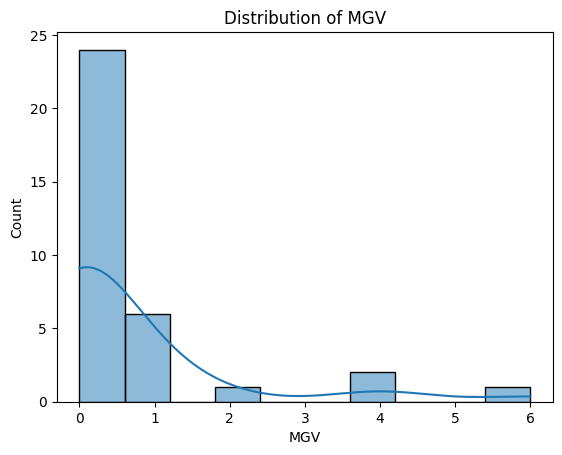

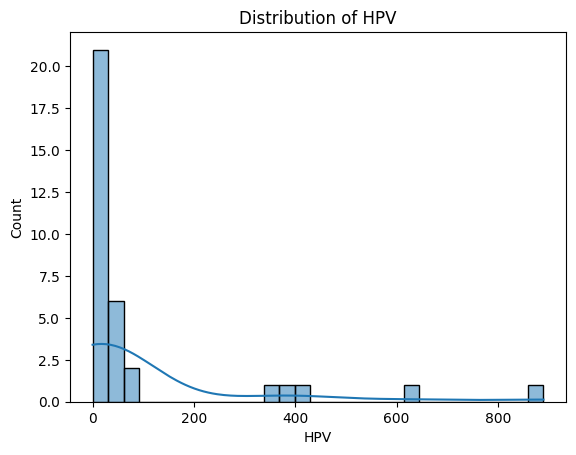

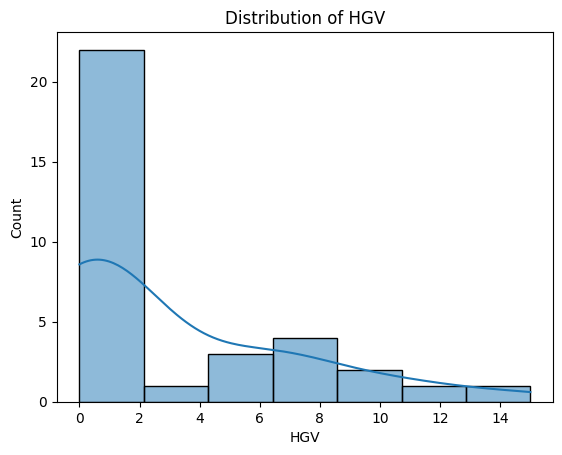

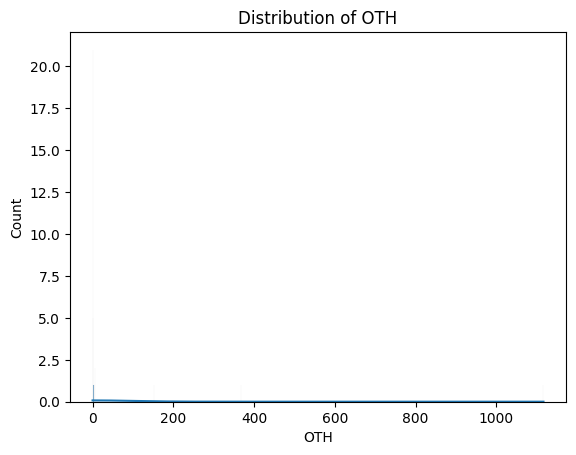

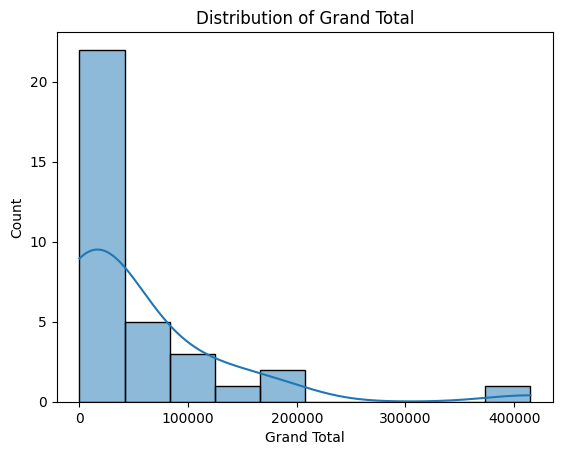

In [129]:
# Univariate distribution plots
for column in df.columns:
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

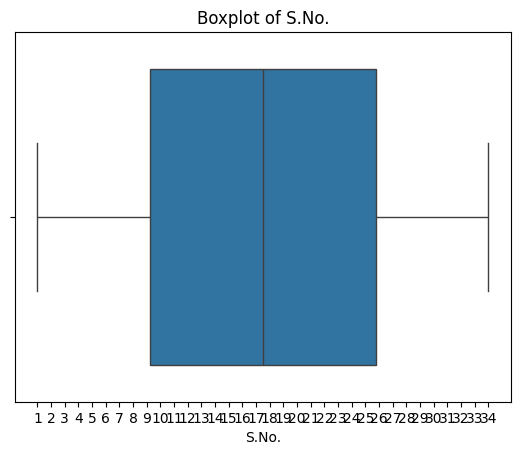

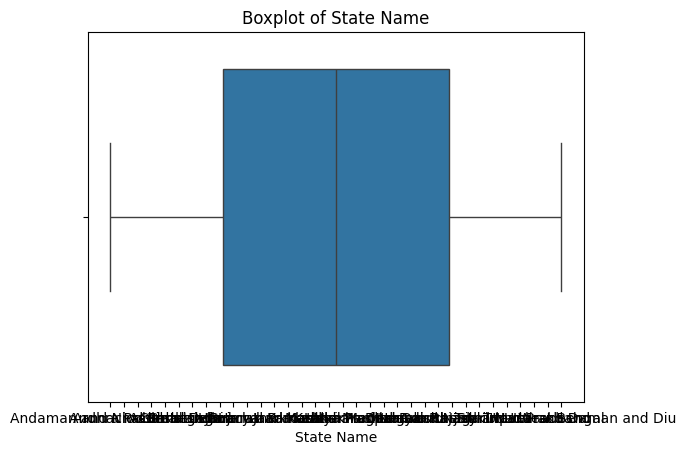

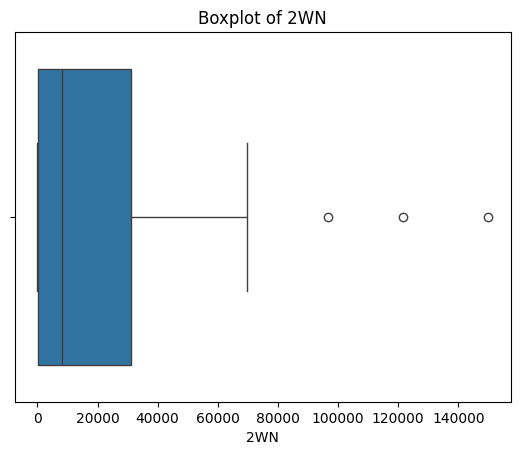

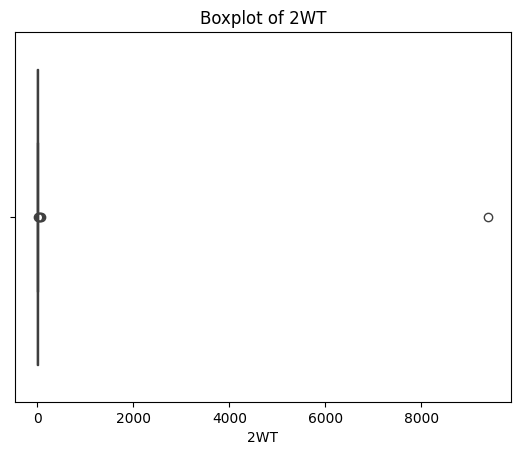

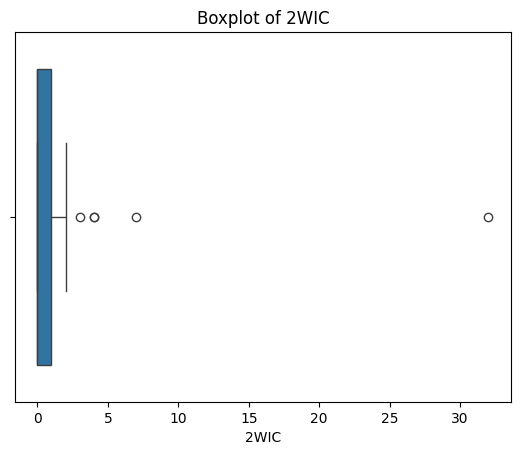

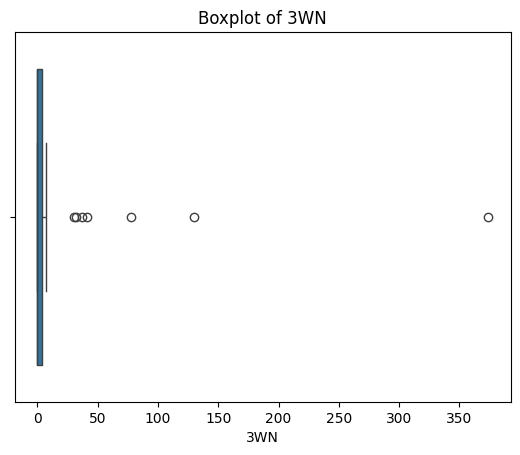

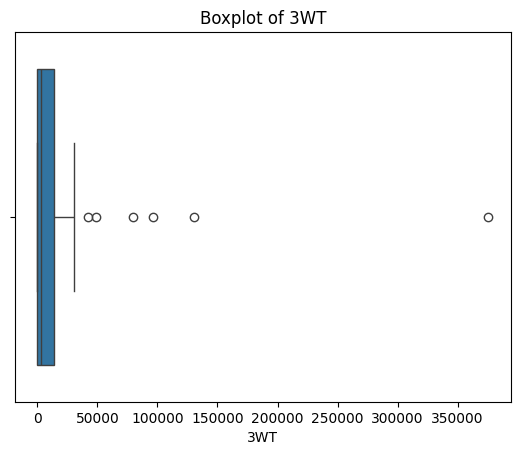

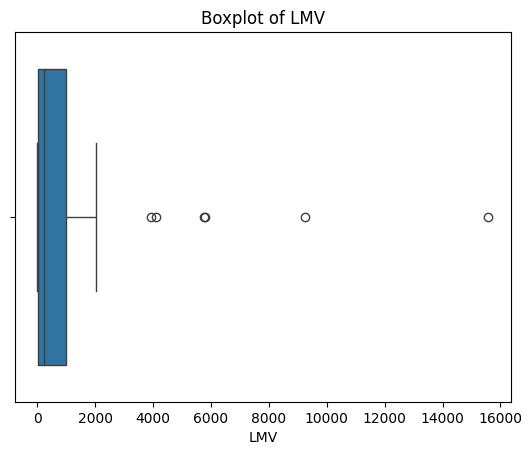

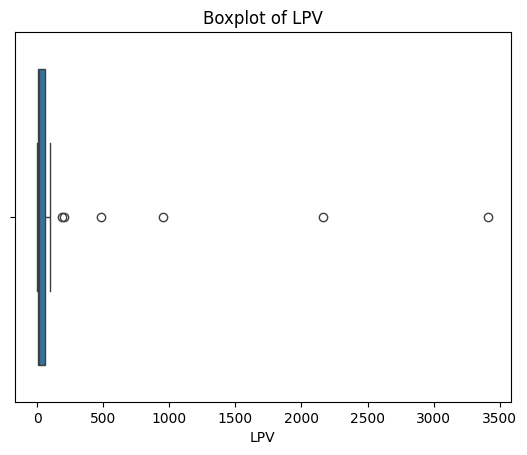

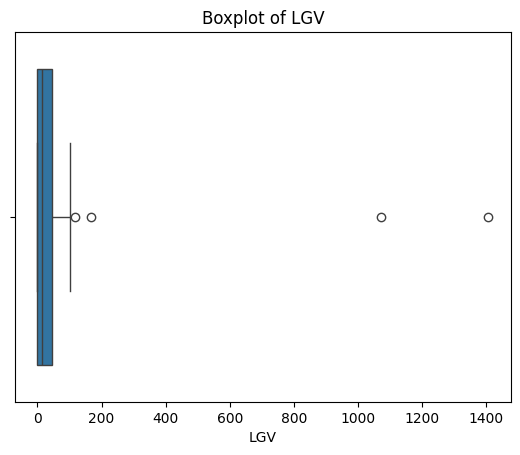

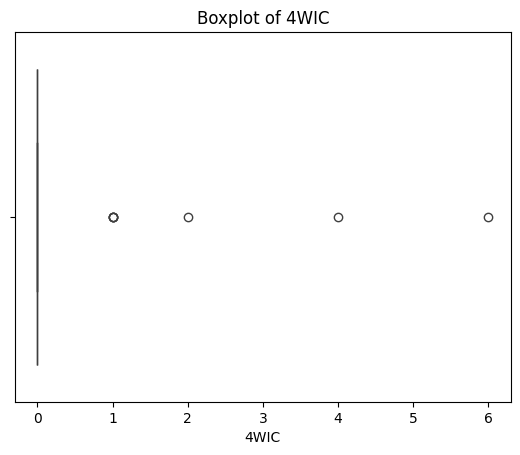

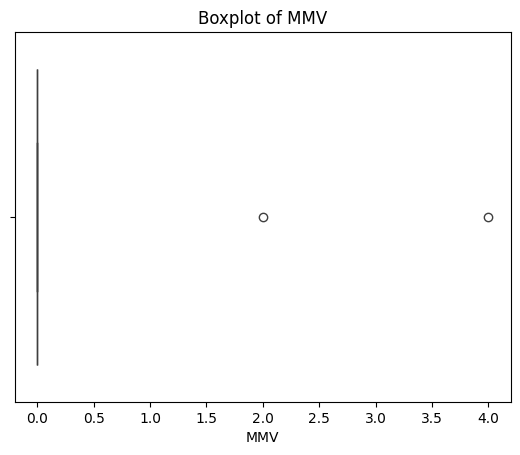

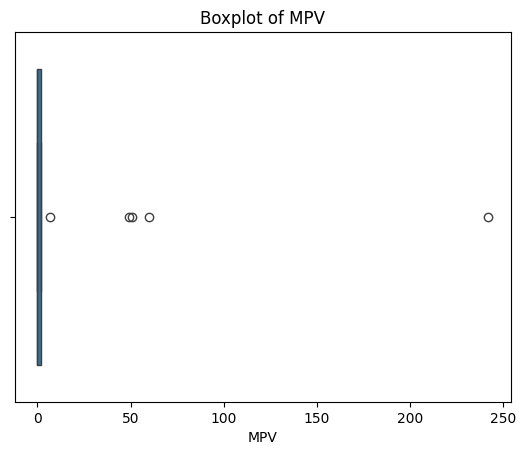

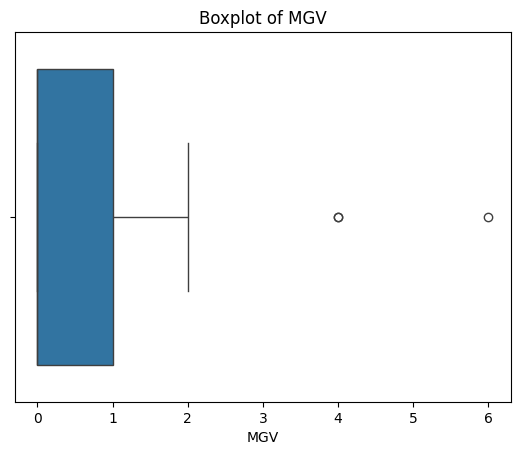

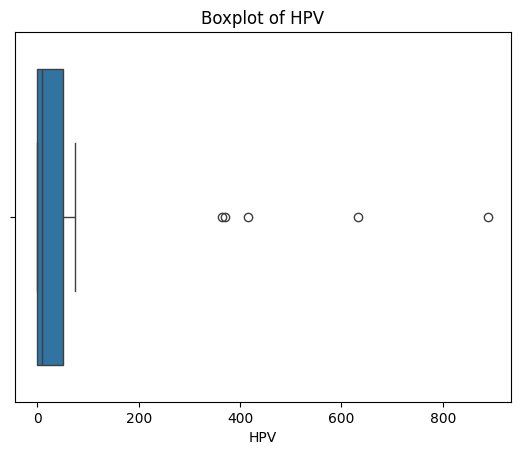

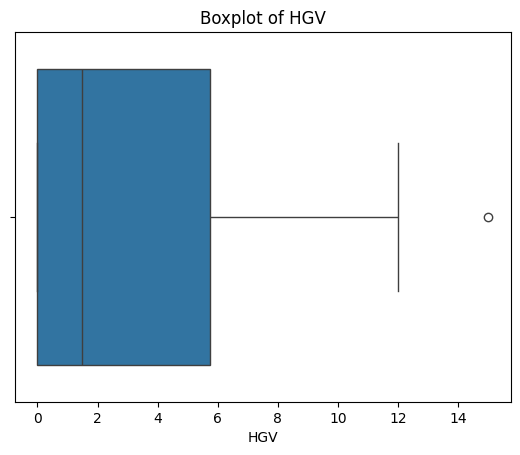

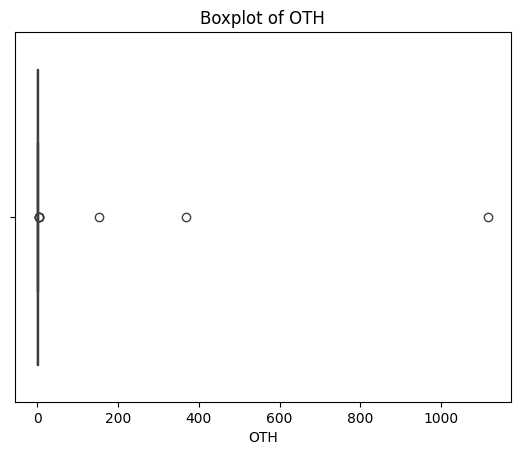

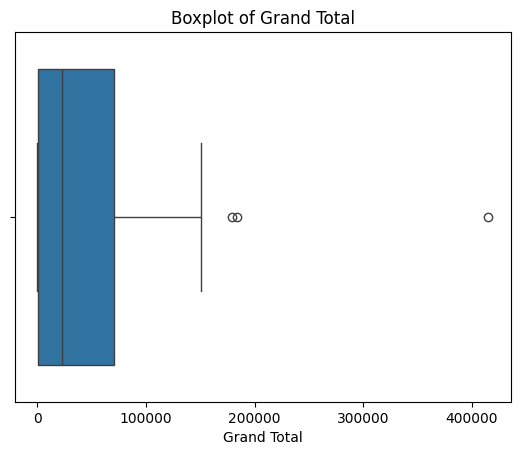

In [130]:
# Box plots for outliers
for column in df.columns:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

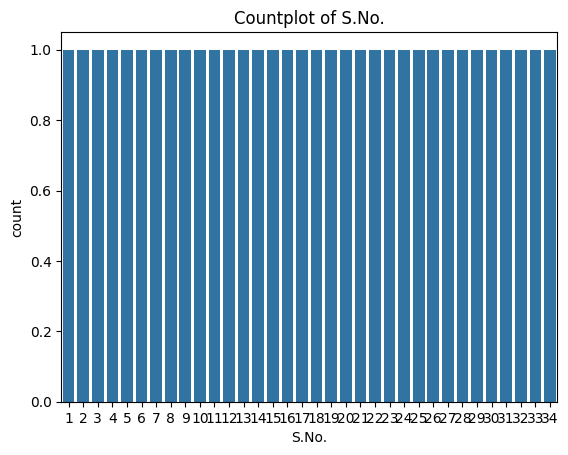

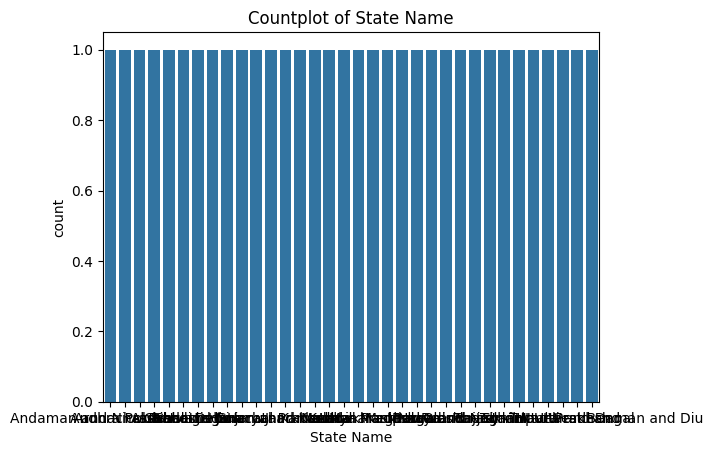

In [131]:
# Categorical variable analysis
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    sns.countplot(x=df[column])
    plt.title(f'Countplot of {column}')
    plt.show()

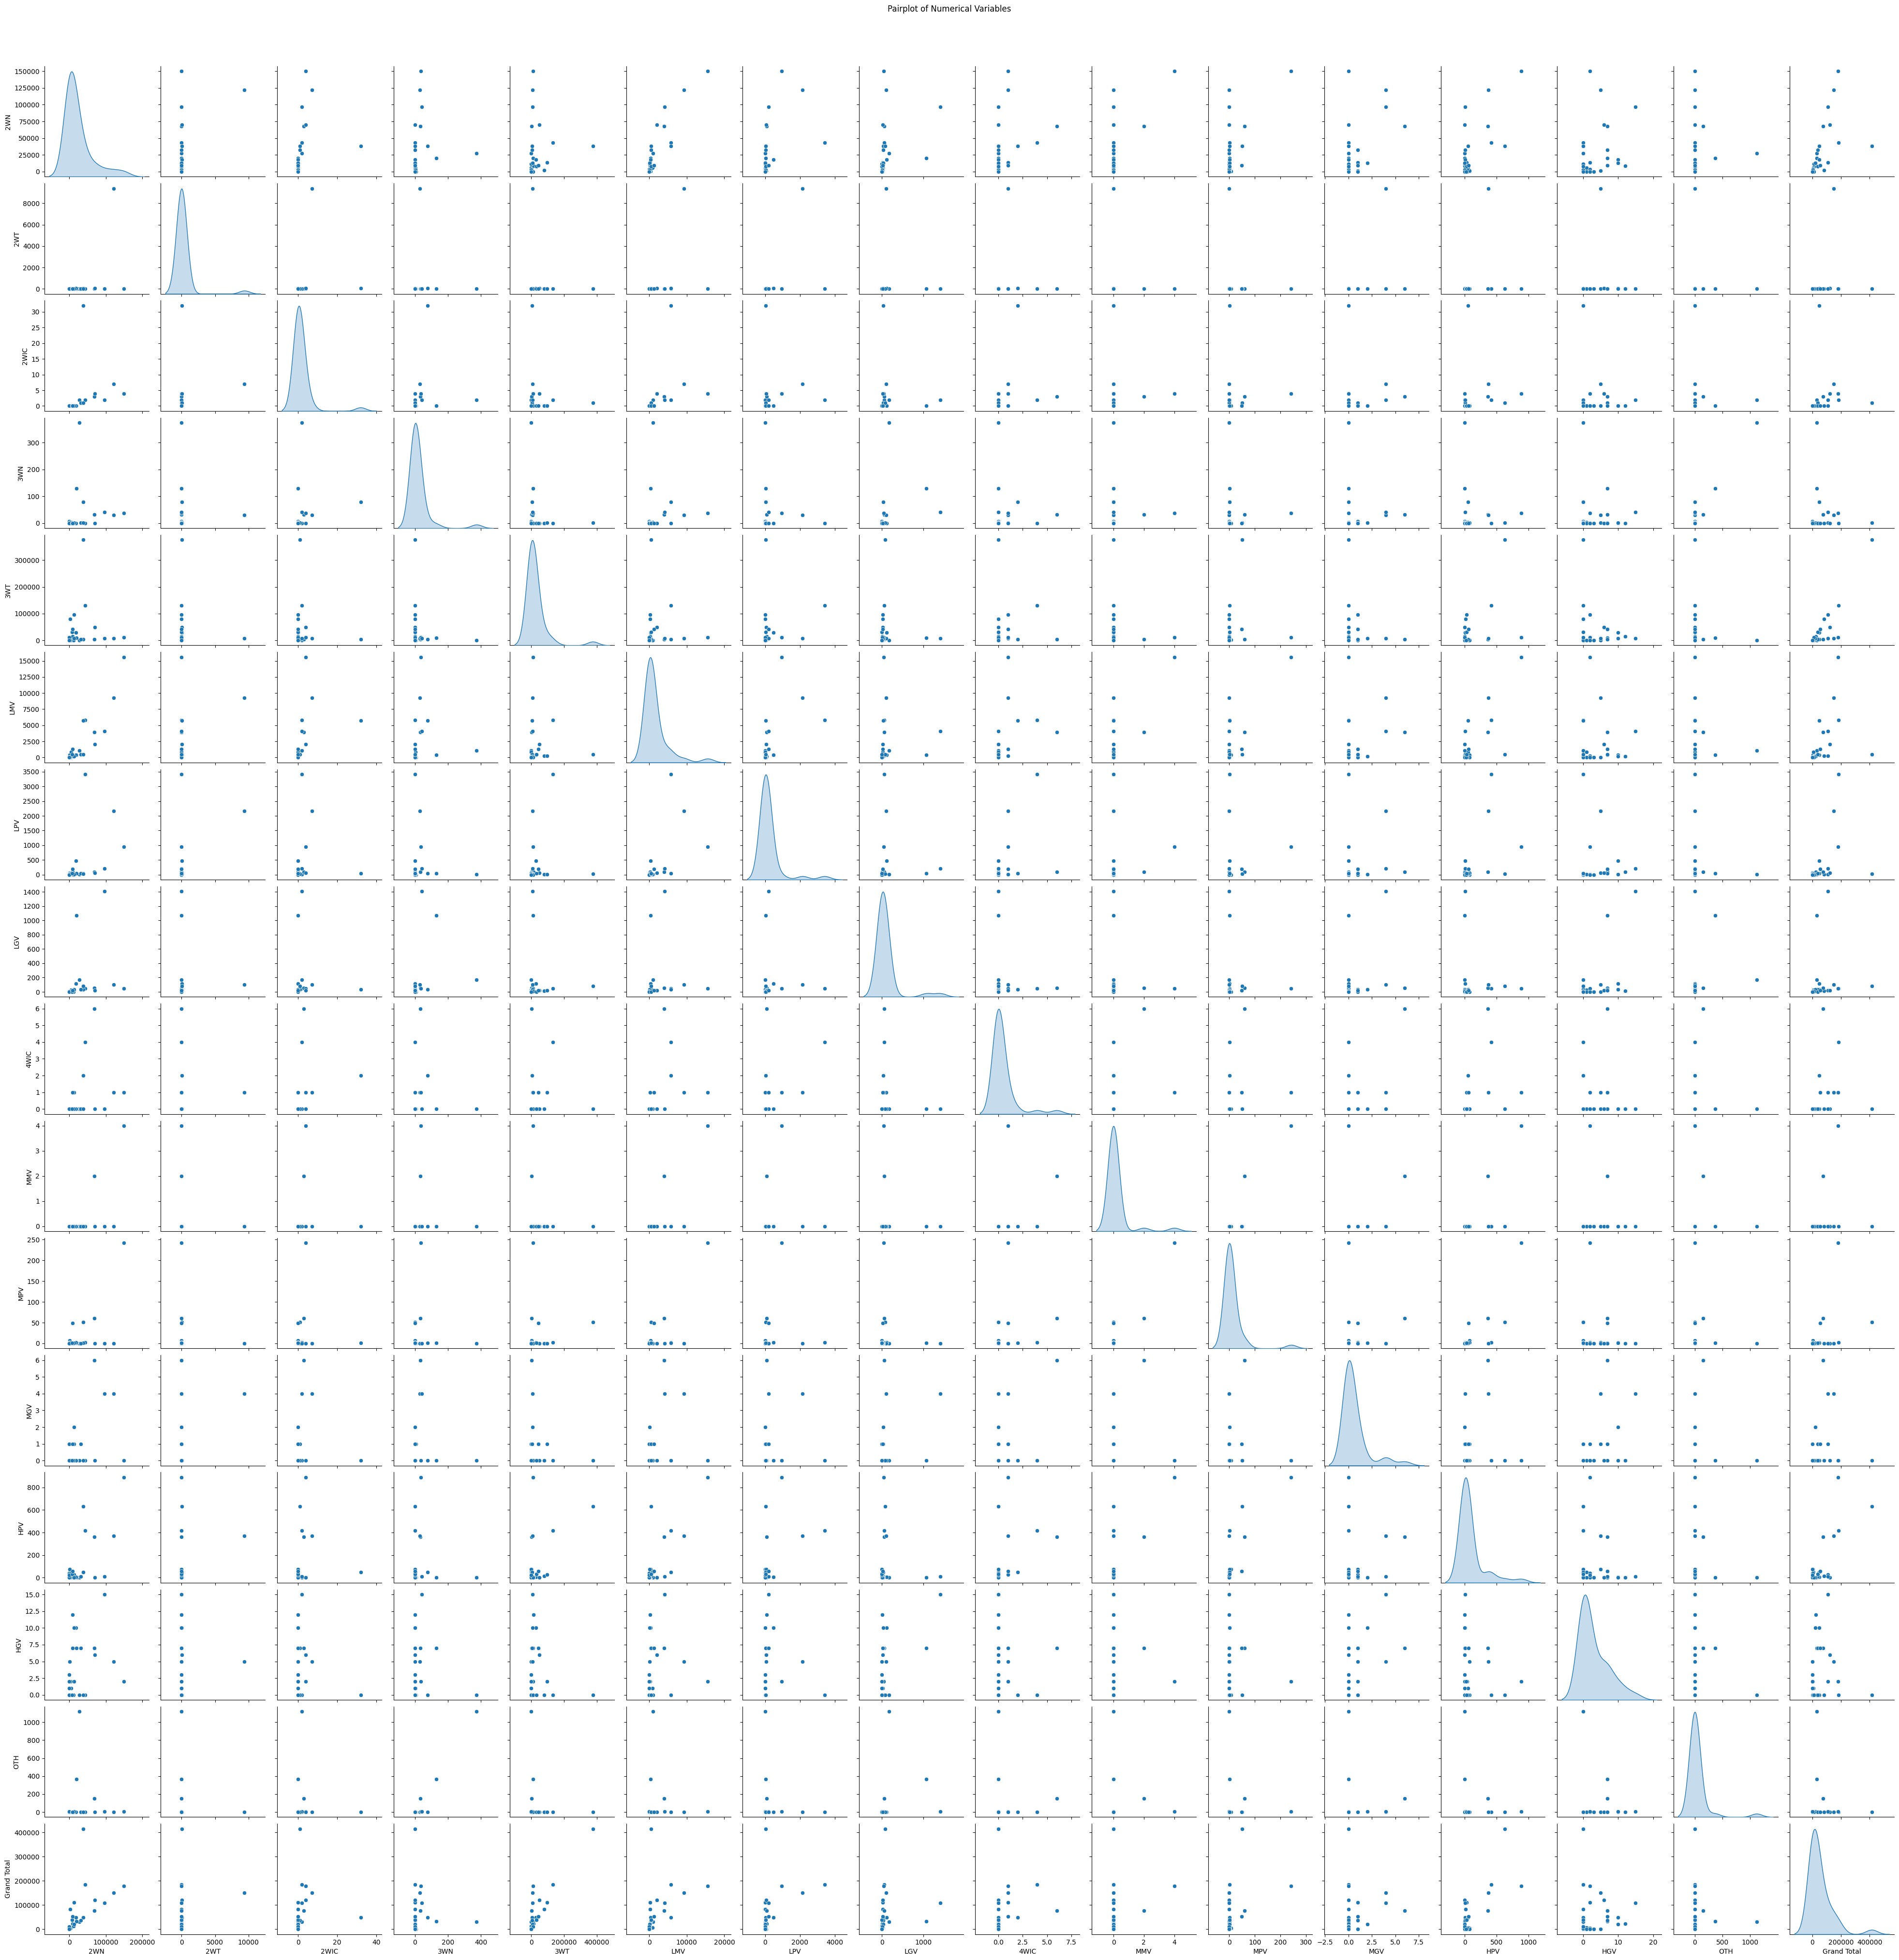

In [132]:
# Scatter plots for numerical variables
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

In [133]:
print(df.dtypes)

S.No.           object
State Name      object
2WN              int64
2WT            float64
2WIC           float64
3WN            float64
3WT            float64
LMV              int64
LPV            float64
LGV            float64
4WIC           float64
MMV            float64
MPV            float64
MGV            float64
HPV            float64
HGV            float64
OTH            float64
Grand Total      int64
dtype: object


In [134]:
# Select numerical columns for conversion
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Convert numerical columns to integer
df[numerical_columns] = df[numerical_columns].astype(float)


In [135]:
print(df.dtypes)

S.No.           object
State Name      object
2WN            float64
2WT            float64
2WIC           float64
3WN            float64
3WT            float64
LMV            float64
LPV            float64
LGV            float64
4WIC           float64
MMV            float64
MPV            float64
MGV            float64
HPV            float64
HGV            float64
OTH            float64
Grand Total    float64
dtype: object


In [136]:
print(df.columns)
df = df.drop('S.No.', axis=1)


Index(['S.No.', 'State Name', '2WN', '2WT', '2WIC', '3WN', '3WT', 'LMV', 'LPV',
       'LGV', '4WIC', 'MMV', 'MPV', 'MGV', 'HPV', 'HGV', 'OTH', 'Grand Total'],
      dtype='object')


In [137]:
print(df.columns)

Index(['State Name', '2WN', '2WT', '2WIC', '3WN', '3WT', 'LMV', 'LPV', 'LGV',
       '4WIC', 'MMV', 'MPV', 'MGV', 'HPV', 'HGV', 'OTH', 'Grand Total'],
      dtype='object')


How are vehicle registrations distributed across different types, such as Two-Wheelers (2WN, 2WT, 2WIC), Three-Wheelers (3WN, 3WT), Light Motor Vehicles (LMV), etc.?

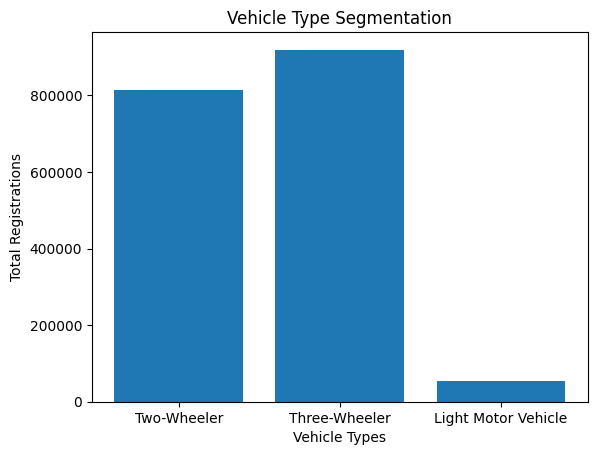

In [138]:
import matplotlib.pyplot as plt

# Example code for segmentation by vehicle type
df['Two-Wheeler Segment'] = df['2WN'] + df['2WT'] + df['2WIC']
df['Three-Wheeler Segment'] = df['3WN'] + df['3WT']
df['Light Motor Vehicle Segment'] = df['LMV']

vehicle_types = ['Two-Wheeler', 'Three-Wheeler', 'Light Motor Vehicle']
segments = [df['Two-Wheeler Segment'].sum(), df['Three-Wheeler Segment'].sum(), df['Light Motor Vehicle Segment'].sum()]

plt.bar(vehicle_types, segments)
plt.xlabel('Vehicle Types')
plt.ylabel('Total Registrations')
plt.title('Vehicle Type Segmentation')
plt.show()


How do vehicle registrations vary across different states

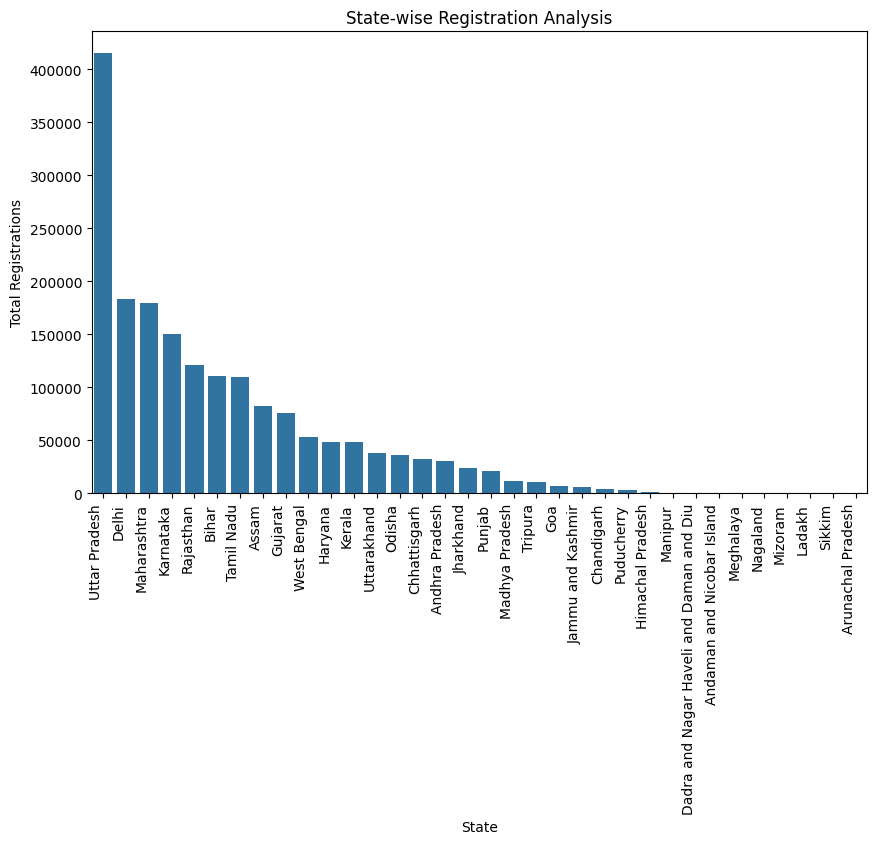

In [139]:
# Example code for state-wise registration analysis
state_registration = df.groupby('State Name')['Grand Total'].sum().sort_values(ascending=False)
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=state_registration.index, y=state_registration.values)
plt.xlabel('State')
plt.ylabel('Total Registrations')
plt.title('State-wise Registration Analysis')
plt.xticks(rotation=90, ha='right')
plt.show()


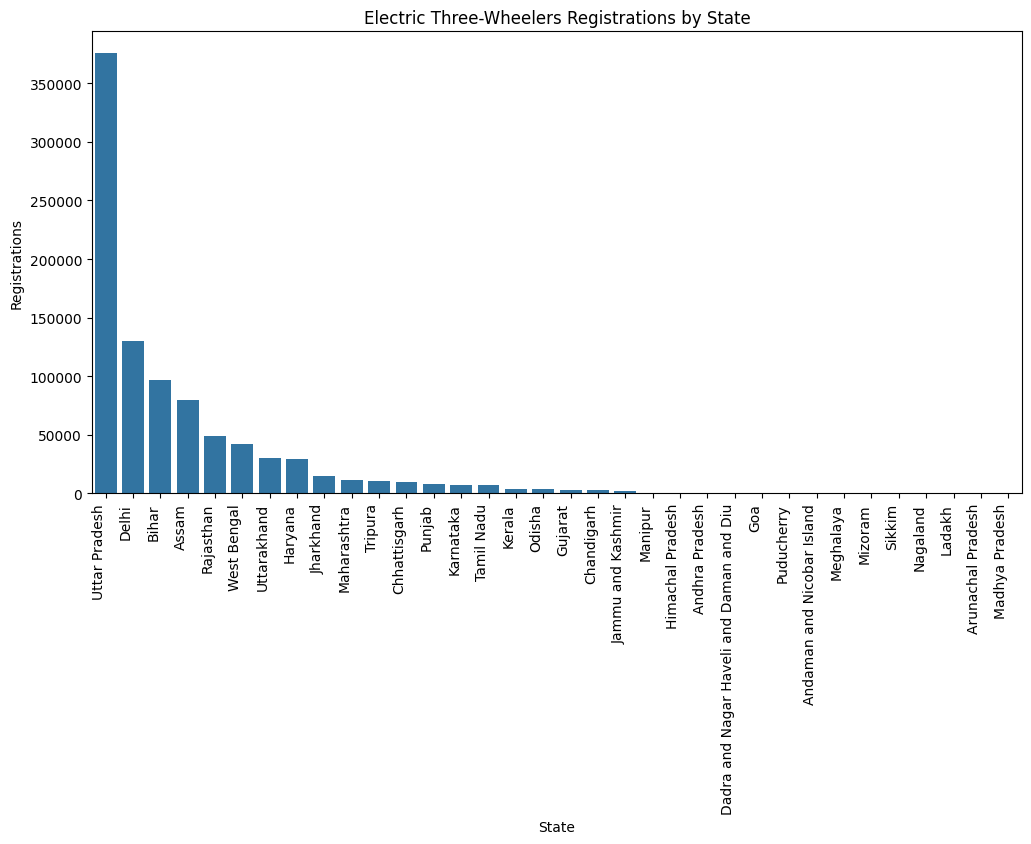

In [140]:
plt.figure(figsize=(12, 6))
sns.barplot(x='State Name', y='3WT', data=df.sort_values(by='3WT', ascending=False))
plt.title('Electric Three-Wheelers Registrations by State')
plt.xlabel('State')
plt.ylabel('Registrations')
plt.xticks(rotation=90, ha='right')
plt.show()

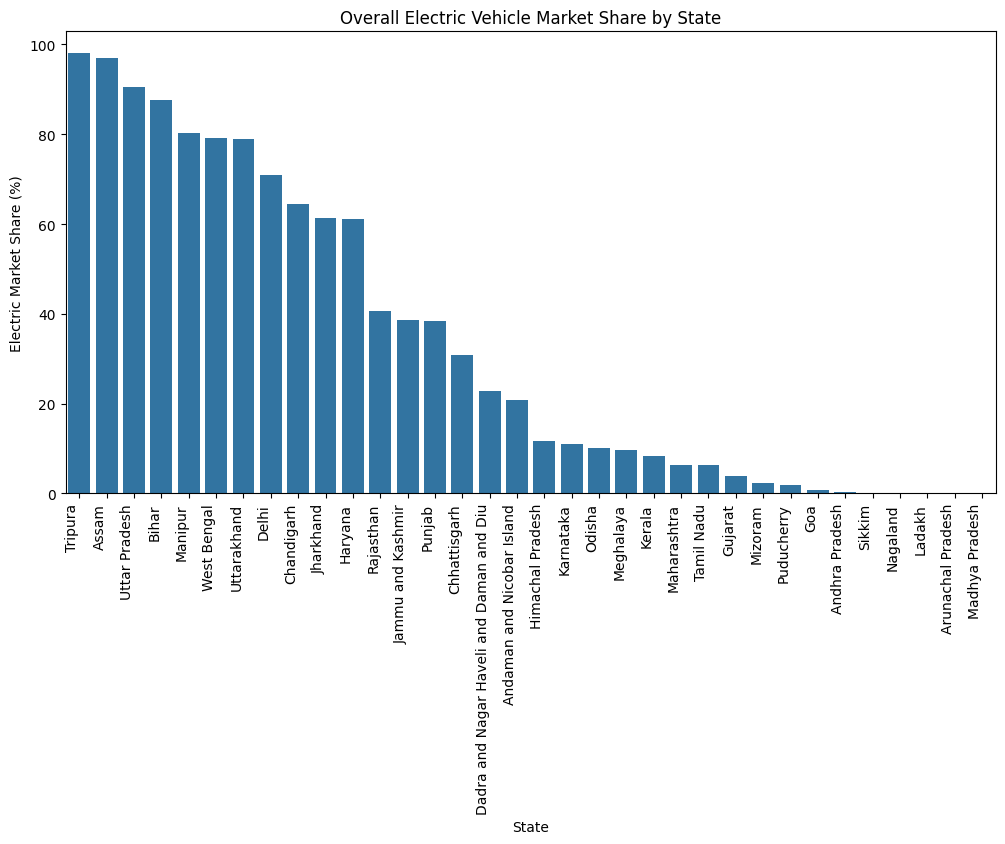

In [141]:
# Assuming 'total_vehicles' is the sum of electric two-wheelers, electric three-wheelers, etc.
df['Total Electric Vehicles'] = df['2WT'] + df['3WT']  # Add other electric vehicle types if needed

df['Electric Market Share (%)'] = (df['Total Electric Vehicles'] / df['Grand Total']) * 100

plt.figure(figsize=(12, 6))
sns.barplot(x='State Name', y='Electric Market Share (%)', data=df.sort_values(by='Electric Market Share (%)', ascending=False))
plt.title('Overall Electric Vehicle Market Share by State')
plt.xlabel('State')
plt.ylabel('Electric Market Share (%)')
plt.xticks(rotation=90, ha='right')
plt.show()


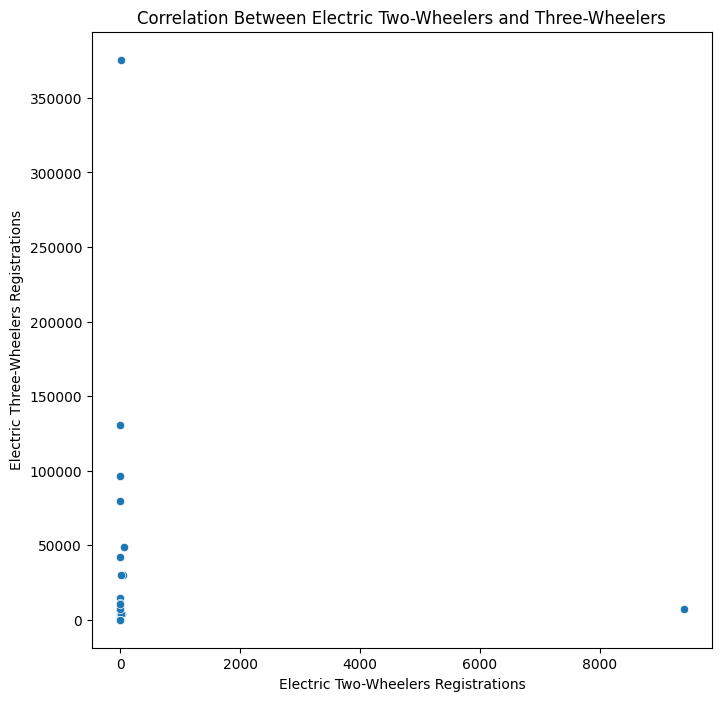

In [142]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='2WT', y='3WT', data=df)
plt.title('Correlation Between Electric Two-Wheelers and Three-Wheelers')
plt.xlabel('Electric Two-Wheelers Registrations')
plt.ylabel('Electric Three-Wheelers Registrations')
plt.show()


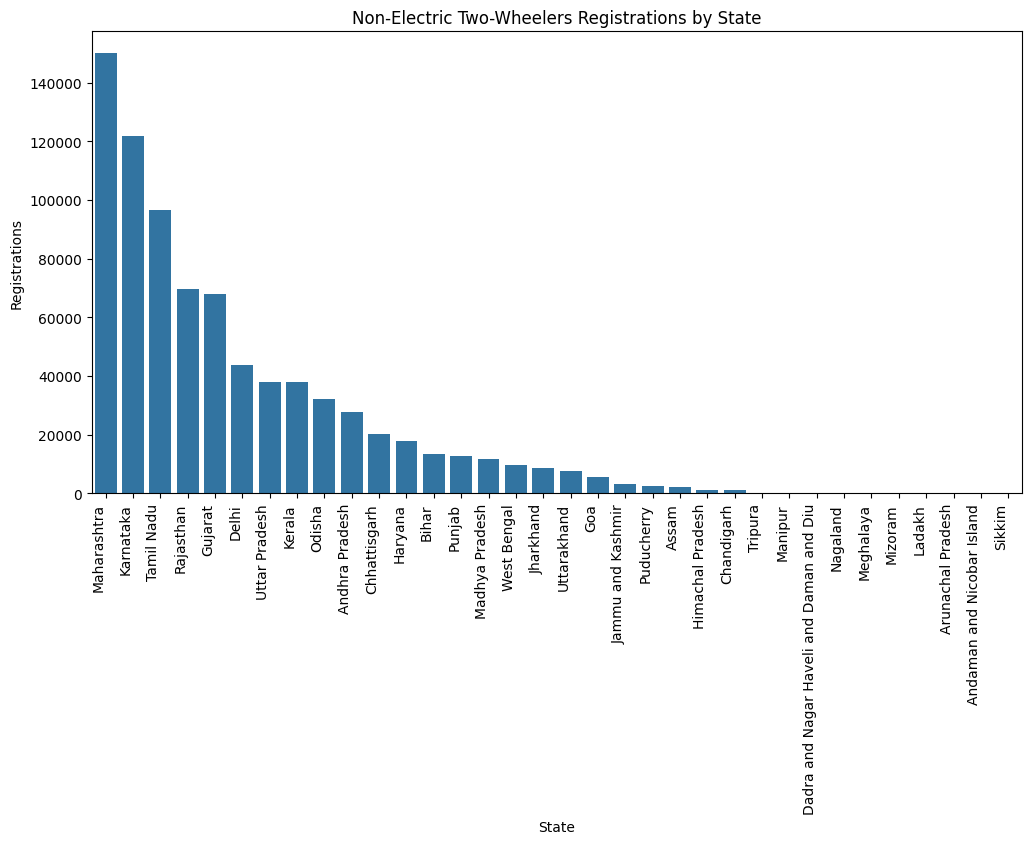

In [143]:
plt.figure(figsize=(12, 6))
sns.barplot(x='State Name', y='2WN', data=df.sort_values(by='2WN', ascending=False))
plt.title('Non-Electric Two-Wheelers Registrations by State')
plt.xlabel('State')
plt.ylabel('Registrations')
plt.xticks(rotation=90, ha='right')
plt.show()


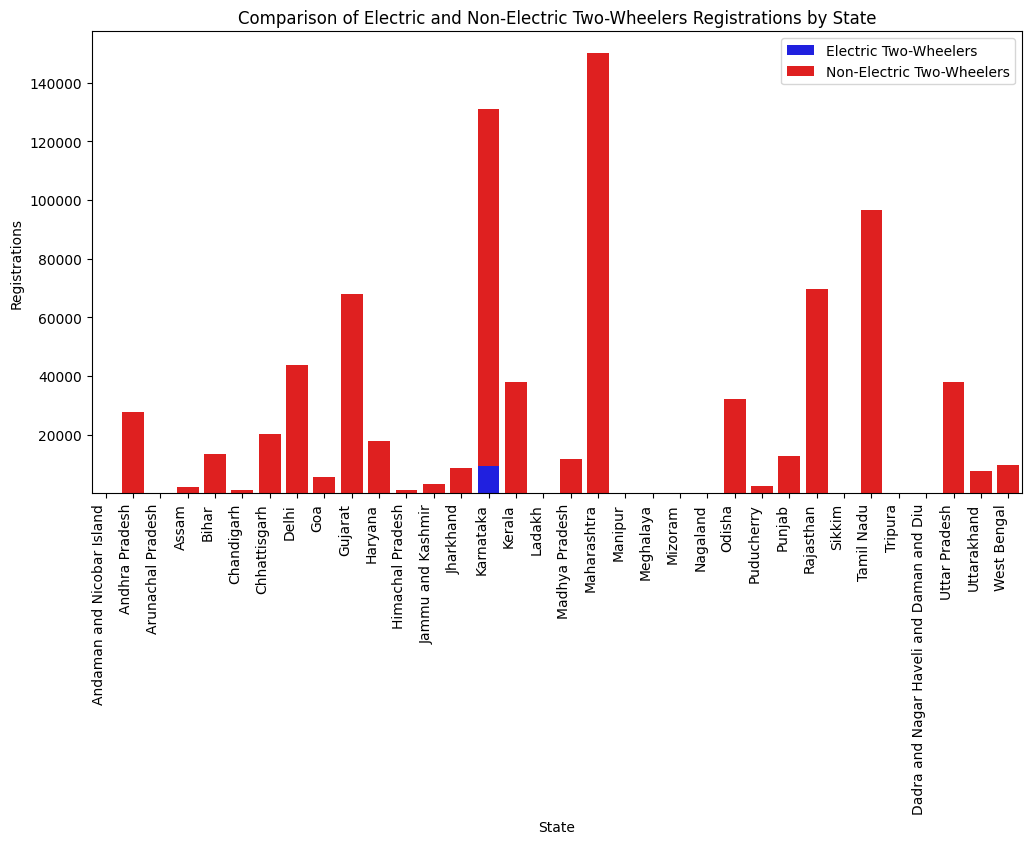

In [144]:
plt.figure(figsize=(12, 6))
sns.barplot(x='State Name', y='2WT', data=df, label='Electric Two-Wheelers', color='blue')
sns.barplot(x='State Name', y='2WN', data=df, label='Non-Electric Two-Wheelers', color='red', bottom=df['2WT'])
plt.title('Comparison of Electric and Non-Electric Two-Wheelers Registrations by State')
plt.xlabel('State')
plt.ylabel('Registrations')
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.show()


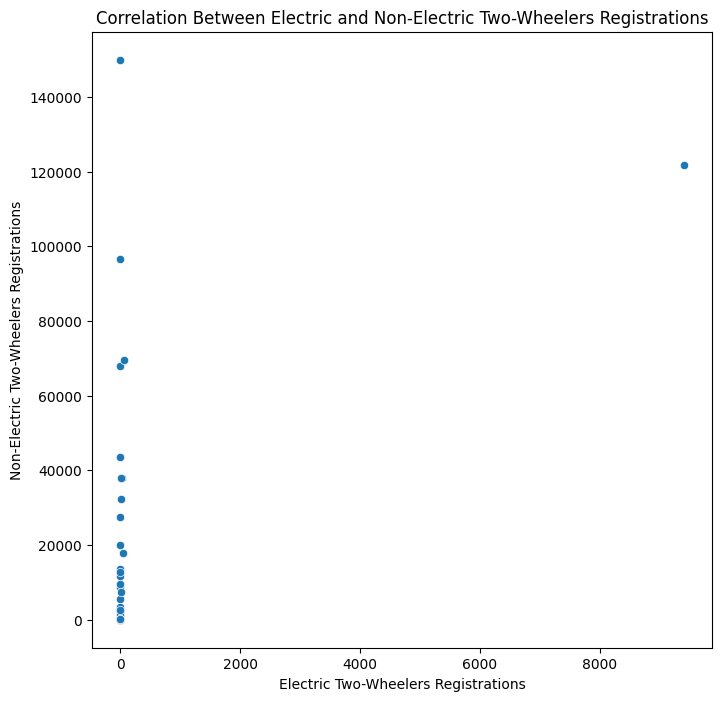

In [145]:
# Assuming you have already scaled features for clustering
plt.figure(figsize=(8, 8))
sns.scatterplot(x='2WT', y='2WN', data=df)
plt.title('Correlation Between Electric and Non-Electric Two-Wheelers Registrations')
plt.xlabel('Electric Two-Wheelers Registrations')
plt.ylabel('Non-Electric Two-Wheelers Registrations')
plt.show()


What is the distribution of registrations for commercial vehicles, including Light Goods Vehicles (LGV), Medium Passenger Vehicles (MPV), Heavy Goods Vehicles (HGV), etc.

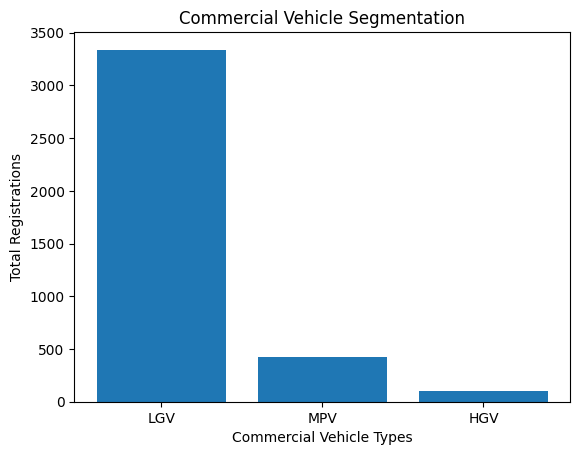

In [146]:
commercial_segments = ['LGV', 'MPV', 'HGV']
commercial_totals = [df['LGV'].sum(), df['MPV'].sum(), df['HGV'].sum()]

plt.bar(commercial_segments, commercial_totals)
plt.xlabel('Commercial Vehicle Types')
plt.ylabel('Total Registrations')
plt.title('Commercial Vehicle Segmentation')
plt.show()


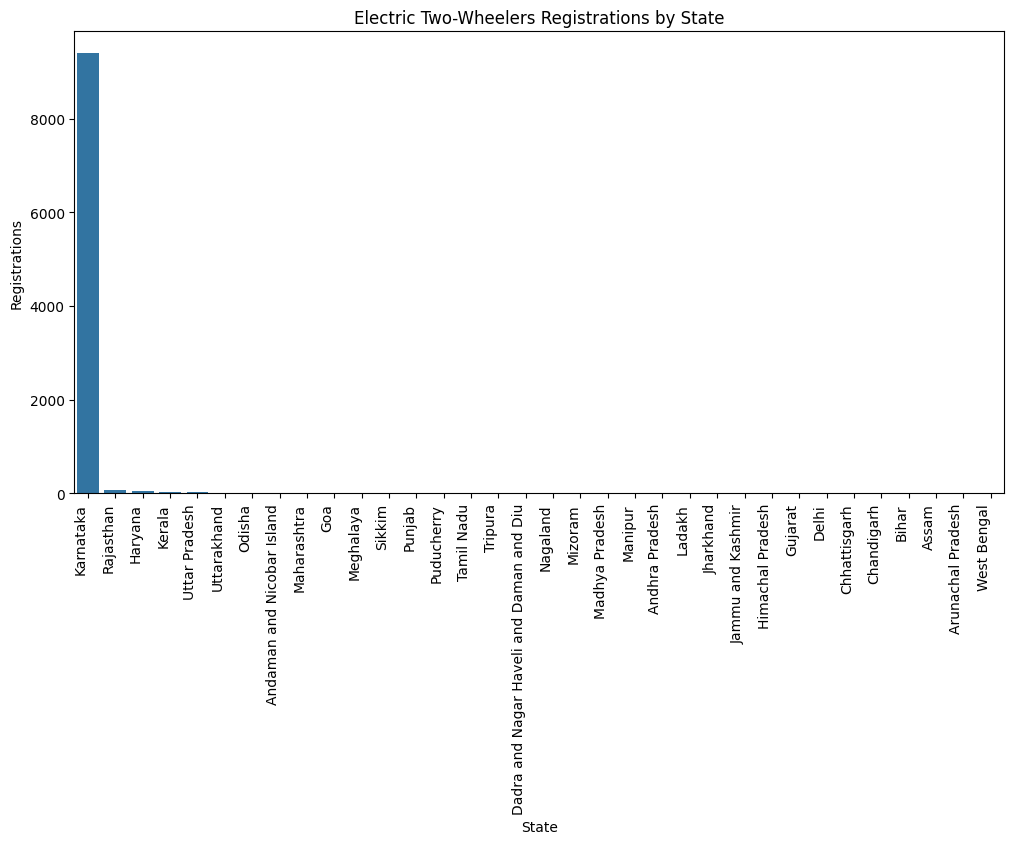

In [147]:
plt.figure(figsize=(12, 6))
sns.barplot(x='State Name', y='2WT', data=df.sort_values(by='2WT', ascending=False))
plt.title('Electric Two-Wheelers Registrations by State')
plt.xlabel('State')
plt.ylabel('Registrations')
plt.xticks(rotation=90, ha='right')
plt.show()


In [148]:
display(df.columns)

Index(['State Name', '2WN', '2WT', '2WIC', '3WN', '3WT', 'LMV', 'LPV', 'LGV',
       '4WIC', 'MMV', 'MPV', 'MGV', 'HPV', 'HGV', 'OTH', 'Grand Total',
       'Two-Wheeler Segment', 'Three-Wheeler Segment',
       'Light Motor Vehicle Segment', 'Total Electric Vehicles',
       'Electric Market Share (%)'],
      dtype='object')

In [149]:
# List of columns to drop
columns_to_drop = ['Two-Wheeler Segment', 'Three-Wheeler Segment', 'Light Motor Vehicle Segment']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)


In [150]:
display(df.columns)

Index(['State Name', '2WN', '2WT', '2WIC', '3WN', '3WT', 'LMV', 'LPV', 'LGV',
       '4WIC', 'MMV', 'MPV', 'MGV', 'HPV', 'HGV', 'OTH', 'Grand Total',
       'Total Electric Vehicles', 'Electric Market Share (%)'],
      dtype='object')

In [151]:
# Select relevant columns for clustering
columns_for_clustering = ['2WN', '2WT', '2WIC', '3WN', '3WT', 'LMV', 'LPV', 'LGV', '4WIC', 'MMV', 'MPV', 'MGV', 'HPV', 'HGV', 'OTH']
# Extract the subset of data for clustering
X = df[columns_for_clustering]

In [152]:
# Standardize the data (important for k-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [153]:
# Determine the optimal number of clusters using the KneeLocator from kneed
wcss = []  # Within-Cluster-Sum-of-Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


In [154]:
pip install kneed

In [155]:
from kneed import KneeLocator

In [156]:
knee_locator = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
optimal_k = knee_locator.elbow

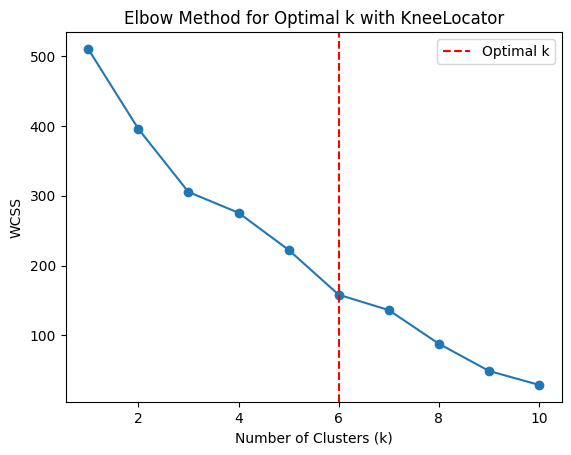

In [157]:
# Plot the Elbow curve with the optimal line
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k with KneeLocator')
plt.axvline(optimal_k, color='red', linestyle='--', label='Optimal k')
plt.legend()
plt.show()

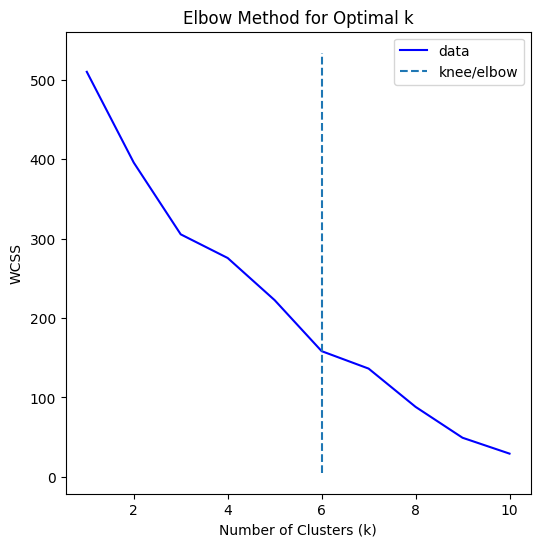

In [158]:

# Plot the KneeLocator result
knee_locator.plot_knee()
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [159]:
# Apply k-means clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

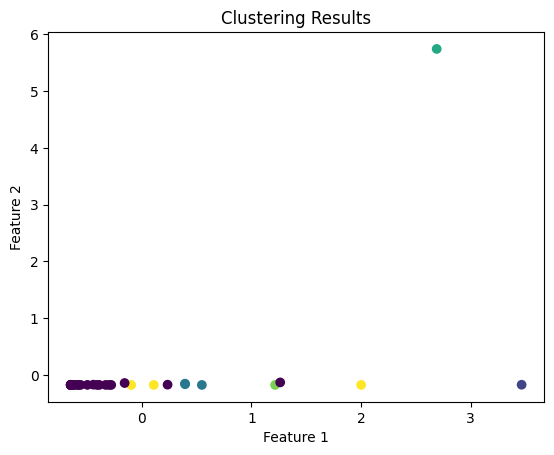

In [160]:
# Visualize the clustering results (for 2D data, you may need dimensionality reduction for more dimensions)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [161]:
# Assuming df is your DataFrame with the vehicle registration data and 'Cluster' column

# Group by the 'Cluster' column and calculate the mean for each cluster
cluster_details = df.groupby('Cluster').mean()

# Display cluster details
print(cluster_details)


                   2WN          2WT       2WIC         3WN            3WT  \
Cluster                                                                     
0          8001.760000     5.720000   0.200000    0.840000   14799.520000   
1        149977.000000     5.000000   4.000000   37.000000   11334.000000   
2         39896.333333    18.333333  11.666667   26.333333  170010.666667   
3        121733.000000  9395.000000   7.000000   30.000000    7105.000000   
4         67990.000000     0.000000   3.000000   32.000000    2964.000000   
5         48114.000000     0.000000   1.333333  181.666667    5619.333333   

              LMV          LPV         LGV  4WIC  MMV         MPV       MGV  \
Cluster                                                                       
0          293.84    42.600000   13.040000  0.08  0.0    2.560000  0.320000   
1        15583.00   954.000000   49.000000  1.00  4.0  242.000000  0.000000   
2         4020.00  1165.333333   56.000000  2.00  0.0   18.000000  

<ipython-input-161-5ebeaaaa09c9>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_details = df.groupby('Cluster').mean()


In [162]:
print(df['Cluster'].value_counts())

0    25
5     3
2     3
4     1
3     1
1     1
Name: Cluster, dtype: int64


In [163]:
# Display the count of samples in each cluster
print(df['Cluster'].value_counts())

0    25
5     3
2     3
4     1
3     1
1     1
Name: Cluster, dtype: int64


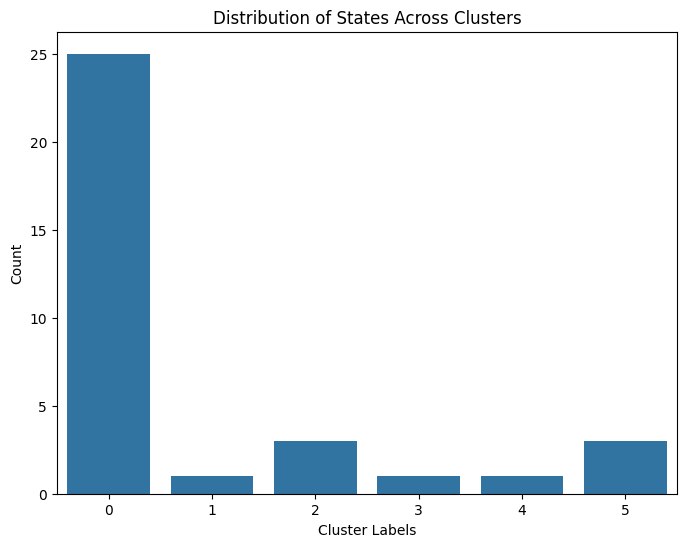

In [167]:
# Assuming 'cluster' is the column containing cluster labels in your DataFrame
# Replace 'cluster' with the actual column name

# Countplot of cluster distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=df)
plt.title('Distribution of States Across Clusters')
plt.xlabel('Cluster Labels')
plt.ylabel('Count')
plt.show()




In [168]:
# Check data distribution for each feature
df.describe()

,2WN,2WT,2WIC,3WN,3WT,LMV,LPV,LGV,4WIC,MMV,MPV,MGV,HPV,HGV,OTH,Grand Total,Total Electric Vehicles,Electric Market Share (%),Cluster
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,23640.441176,282.294118,1.705882,21.882353,27008.264706,1580.205882,235.764706,98.205882,0.470588,0.176471,12.382353,0.647059,94.029412,3.117647,48.852941,53028.441176,27290.558824,33.342128,0.852941
std,37011.280885,1610.251712,5.584228,67.788783,68686.697853,3264.551496,689.491691,294.704555,1.260959,0.757611,43.352687,1.390059,203.013134,4.088155,200.357730,83449.854501,68626.340945,34.737876,1.635447
min,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000
25%,156.250000,0.000000,0.000000,0.000000,50.500000,37.000000,2.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,965.000000,50.750000,2.683992,0.000000
50%,8140.500000,0.000000,0.000000,0.000000,3301.000000,232.000000,13.500000,13.000000,0.000000,0.000000,0.000000,0.000000,9.500000,1.500000,0.000000,22294.500000,3304.500000,16.135194,0.000000
75%,31074.500000,4.000000,1.000000,4.000000,13638.750000,1002.750000,57.500000,46.000000,0.000000,0.000000,1.750000,1.000000,50.750000,5.750000,1.000000,70120.250000,15976.750000,63.695501,0.750000
max,149977.000000,9395.000000,32.000000,374.000000,375595.000000,15583.000000,3415.000000,1406.000000,6.000000,4.000000,242.000000,6.000000,890.000000,15.000000,1117.000000,414978.000000,375615.000000,98.022702,5.000000


In [169]:
# Group by cluster and calculate basic statistics
cluster_descriptions = df.groupby('Cluster').describe()

# Display the cluster descriptions
print(cluster_descriptions)

          2WN                                                             \
        count           mean           std       min       25%       50%   
Cluster                                                                    
0        25.0    8001.760000  14965.436577       1.0      50.0    2287.0   
1         1.0  149977.000000           NaN  149977.0  149977.0  149977.0   
2         3.0   39896.333333   3230.874391   38019.0   38031.0   38043.0   
3         1.0  121733.000000           NaN  121733.0  121733.0  121733.0   
4         1.0   67990.000000           NaN   67990.0   67990.0   67990.0   
5         3.0   48114.000000  42158.844849   20112.0   23870.5   27629.0   

                              2WT               ... Total Electric Vehicles  \
              75%       max count         mean  ...                     75%   
Cluster                                         ...                           
0          9515.0   69685.0  25.0     5.720000  ...                 14407.0   